# Import Data

In [ ]:
# Load testing dataframe
# file = '1W0ytmDTBmJFWhZpTBCxbGFlkN5HPBlQx'
# url = f'https://drive.google.com/uc?id={file}'

from google.colab import files
uploaded = files.upload()

Saving ab_data.csv to ab_data.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['ab_data.csv']))

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# Sampling

## Slovin

In [ ]:
df.shape

(294478, 5)

In [ ]:
df.shape[0]

294478

In [ ]:
# Slovin Method
N = df.shape[0]
e = 0.05 #5% margin of error

slovin_sample = N/(1+N * e**2)

In [ ]:
slovin_sample

399.45740272248173

## Based on Size

In [ ]:
df_sample_400 = df.sample(n=400) # secara acak dengan ketentuan yg kita tentukan sendiri ex = 4000

In [ ]:
df_sample_400['group'].value_counts()

control      205
treatment    195
Name: group, dtype: int64

In [ ]:
df_sample_400.head()

,user_id,timestamp,group,landing_page,converted
239136,905729,2017-01-07 08:42:29.823207,control,old_page,0
144100,701566,2017-01-21 19:13:54.761795,treatment,new_page,0
23500,816367,2017-01-24 03:18:25.455654,control,old_page,0
190841,645087,2017-01-03 09:36:26.820511,control,old_page,0
62394,754367,2017-01-10 15:33:00.101136,control,old_page,0


## Fraction

In [ ]:
df.sample(frac=0.25)

,user_id,timestamp,group,landing_page,converted
202699,754436,2017-01-19 03:49:58.838122,treatment,new_page,0
75938,937862,2017-01-08 14:45:39.459394,treatment,new_page,0
22912,721709,2017-01-06 14:31:32.446103,treatment,new_page,0
167367,876850,2017-01-05 08:59:59.859823,treatment,new_page,0
126342,868491,2017-01-06 17:37:29.961782,control,old_page,1
...,...,...,...,...,...
68980,853339,2017-01-13 07:47:20.176453,treatment,new_page,0
97017,696590,2017-01-05 15:30:33.406978,control,old_page,0
197694,842841,2017-01-05 04:03:27.203128,treatment,new_page,0
209295,640449,2017-01-18 00:40:26.433724,treatment,new_page,0


## Stratified Sampling

In [ ]:
df_sample_stratified = df.groupby(['group']).apply(lambda x: x.sample(n=200,random_state=0))
df_sample_stratified

user_id                   timestamp      group landing_page  \
group                                                                           
control   85874    779213  2017-01-19 17:35:51.276797    control     old_page   
          222214   724864  2017-01-22 19:38:24.762239    control     old_page   
          286529   680844  2017-01-09 22:43:09.877948    control     old_page   
          270276   803748  2017-01-14 23:26:55.247755    control     old_page   
          131387   811343  2017-01-21 20:02:28.359658    control     old_page   
...                   ...                         ...        ...          ...   
treatment 148595   802048  2017-01-11 00:01:01.228466  treatment     new_page   
          293006   673585  2017-01-03 20:57:58.456966  treatment     new_page   
          74521    831518  2017-01-14 07:29:09.719221  treatment     new_page   
          168196   835709  2017-01-23 01:44:33.935291  treatment     new_page   
          113653   711205  2017-01-02 20:23:59.102799  treatment     new_page   

                  converted  
group                        
control   85874           0  
          222214          0  
          286529          0  
          270276          0  
          131387          0  
...                     ...  
treatment 148595          0  
          293006          0  
          74521           0  
          168196          0  
          113653          0  

[400 rows x 5 columns]

In [ ]:
df_sample_stratified['group'].value_counts()

control      200
treatment    200
Name: group, dtype: int64

# Experiment

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.shape

(294478, 5)

## Memisahkan control dan treatment

In [ ]:
control = df[df['group']=='control']
treatment = df[df['group']=='treatment']

In [ ]:
control.shape

(147202, 5)

In [ ]:
treatment.shape

(147276, 5)

## Kalkulasi conversion

In [ ]:
# Hitung jumlah konversi
n_success_control = control['converted'].sum()
n_success_treatment = treatment['converted'].sum()

# Menghitung semua sample pada control dan treatment
n_obs_control = control['converted'].count()
n_obs_treatment = treatment['converted'].count()

In [ ]:
print(n_obs_control, n_success_control, n_obs_treatment, n_success_treatment)

147202 17723 147276 17514


## Hitung Conversion Rate

In [ ]:
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment

In [ ]:
print('Conversion Rate Control : {0:0.4f}%'.format(control_conversion_rate*100))
print('Conversion Rate Treatment : {0:0.4f}%'.format(treatment_conversion_rate*100))

Conversion Rate Control : 12.0399%
Conversion Rate Treatment : 11.8920%


In [ ]:
import matplotlib.pyplot as plt

(0.118, 0.1205)

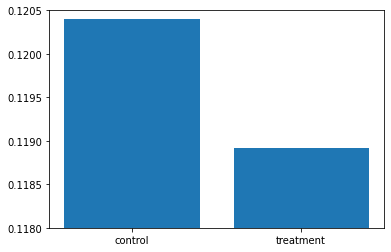

In [ ]:
x = ['control','treatment']
value = [control_conversion_rate,treatment_conversion_rate]
plt.bar(x,value)

plt.ylim(0.118,0.1205)

## Statistical Test

In [ ]:
import numpy as np
import statsmodels.stats.proportion as sp

In [ ]:
# Mengubah menjadi array
success = np.array([n_success_control,n_success_treatment])
obs = np.array([n_obs_control,n_obs_treatment])

In [ ]:
stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Failed to reject H0')
else :
    print('Reject H0')

P-Value : 0.2161
Failed to reject H0


In [6]:
a= round(3.56, 0)

In [7]:
print(a)

4.0
